In [3]:
import matplotlib.pyplot as plt
import os
import numpy as np 
import sys
import pandas as pd
import seaborn as sns

In [4]:
os.getcwd()

'C:\\Users\\Admin'

In [5]:
os.chdir("C:\\Users\\Admin\\.cache\\kagglehub\\datasets\\sattvikyadav\\premier-league-2024-2025-team-statistics\\versions\\1") 

In [6]:
df = pd.read_csv('premier_league_stats_2024-25.csv')

## 1. Displaying the Pandas Dataframe for 2024/25 Premier League Team statistics

In [12]:
df.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Liverpool,38,25,9,4,86,41,45,84,2.21,82.2,38.6,43.6,1.15,60324,Mohamed Salah - 29,Alisson,→ Champions League via league finish
1,2,Arsenal,38,20,14,4,69,34,35,74,1.95,59.9,34.4,25.5,0.67,60251,Kai Havertz - 9,David Raya,→ Champions League via league finish
2,3,Manchester City,38,21,8,9,72,44,28,71,1.87,68.1,47.7,20.4,0.54,52756,Erling Haaland - 22,Ederson,→ Champions League via league finish
3,4,Chelsea,38,20,9,9,64,43,21,69,1.82,67.8,47.3,20.5,0.54,39672,Cole Palmer - 15,Robert Sánchez,→ Champions League via league finish
4,5,Newcastle Utd,38,20,6,12,68,47,21,66,1.74,63.8,45.5,18.3,0.48,52187,Alexander Isak - 23,Nick Pope,→ Europa League via league finish


In [14]:
Top_Scorers = df.sort_values(by='Attendance',ascending=False)[['Squad','Attendance']].head(10)
print(Top_Scorers)

              Squad  Attendance
14   Manchester Utd       73747
13         West Ham       62463
16        Tottenham       61127
0         Liverpool       60324
1           Arsenal       60251
2   Manchester City       52756
4     Newcastle Utd       52187
5       Aston Villa       42079
3           Chelsea       39672
12          Everton       38439


In [16]:
Top_Scorers.reset_index(drop=True, inplace=True)

## 2. Displaying the Top 10 highest attendance by Team

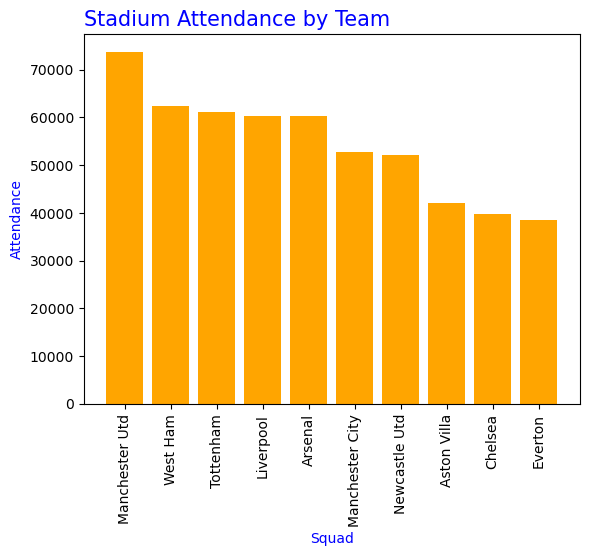

In [19]:
plt.bar(Top_Scorers['Squad'],Top_Scorers['Attendance'], color='orange')
plt.title('Stadium Attendance by Team',color='blue',loc='left',fontsize=15)
plt.ylabel('Attendance',color='Blue')
plt.xlabel('Squad',color='Blue')
plt.xticks(rotation=90)

plt.show()

In [20]:
league_top = df.sort_values(by='Pts',ascending=False)[['Squad','Pts']].head(10)

In [23]:
print(league_top)

             Squad  Pts
0        Liverpool   84
1          Arsenal   74
2  Manchester City   71
3          Chelsea   69
4    Newcastle Utd   66
5      Aston Villa   66
6  Nott'ham Forest   65
7         Brighton   61
8      Bournemouth   56
9        Brentford   56


## 3. Displaying the total Points by Team for 2024/25 Season

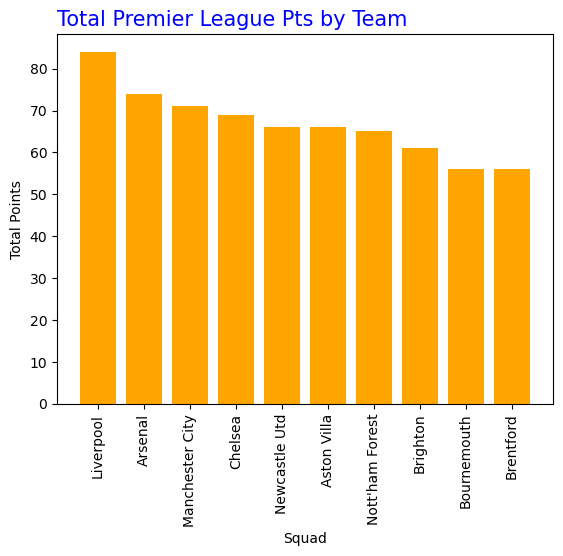

In [26]:
plt.bar(league_top['Squad'],league_top['Pts'], color='orange')
plt.title('Total Premier League Pts by Team',color='blue',loc='left',fontsize=15)
plt.ylabel('Total Points')
plt.xlabel('Squad')
plt.xticks(rotation=90)
plt.show()

## 4. Displaying the top 10 losing Teams in 2024/25 Season

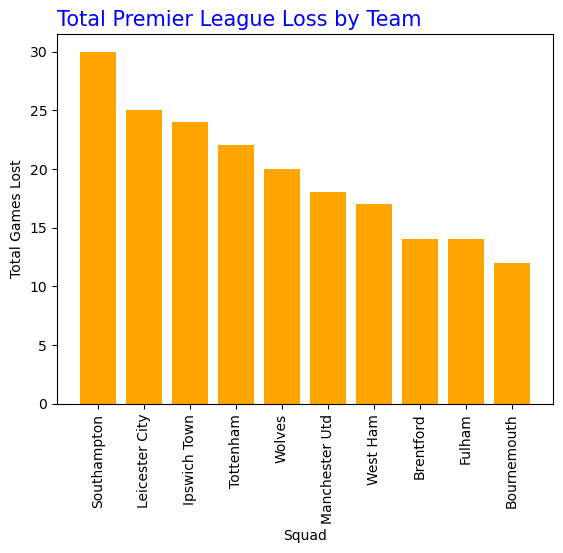

In [29]:
total_loss = df.sort_values(by='L',ascending=False)[['Squad','L']].head(10)
plt.bar(total_loss['Squad'],total_loss['L'], color='orange')
plt.title('Total Premier League Loss by Team',color='blue',loc='left',fontsize=15)
plt.ylabel('Total Games Lost')
plt.xlabel('Squad')
plt.xticks(rotation=90)

plt.show()

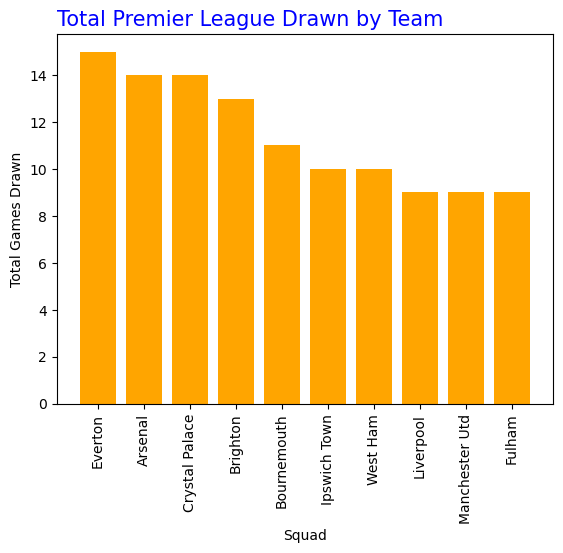

In [31]:
total_drawn = df.sort_values(by='D',ascending=False)[['Squad','D']].head(10)
plt.bar(total_drawn['Squad'],total_drawn['D'], color='orange')
plt.title('Total Premier League Drawn by Team',color='blue',loc='left',fontsize=15)
plt.ylabel('Total Games Drawn')
plt.xlabel('Squad')
plt.xticks(rotation=90)

plt.show()

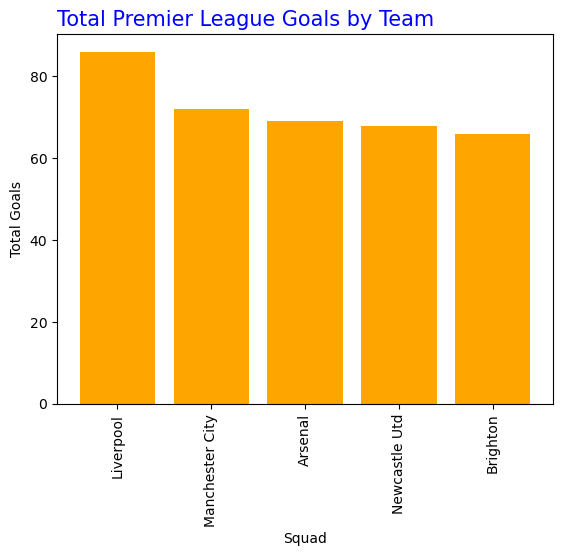

In [33]:
total_goalsfor = df.sort_values(by='GF',ascending=False)[['Squad','GF']].head(5)
plt.bar(total_goalsfor['Squad'],total_goalsfor['GF'], color='orange')
plt.title('Total Premier League Goals by Team',color='blue',loc='left',fontsize=15)
plt.ylabel('Total Goals')
plt.xlabel('Squad')
plt.xticks(rotation=90)

plt.show()

## Calculate the Derived Values like Win,Loss,Draw Ratio per team

In [36]:
df['wPercentage'] = (df['W']/38)*100
df['dPercentage'] = (df['D']/38)*100
df['lPercentage'] = (df['L']/38)*100


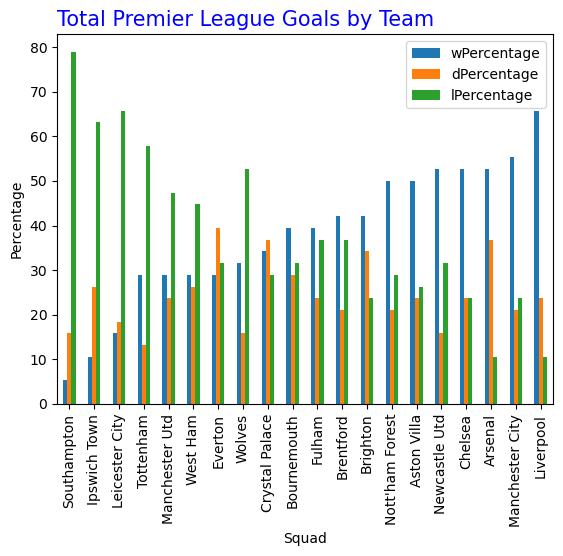

In [38]:
total_stats = df.sort_values(by='wPercentage',ascending=True)[['Squad','wPercentage','dPercentage','lPercentage']]
#plt.bar(total_stats['Squad'],total_stats['GF'], color='purple')
total_stats.plot(kind='bar',x='Squad')
plt.title('Total Premier League Goals by Team',color='blue',loc='left',fontsize=15)
plt.ylabel('Percentage')
plt.xlabel('Squad')
plt.xticks(rotation=90)

plt.show()

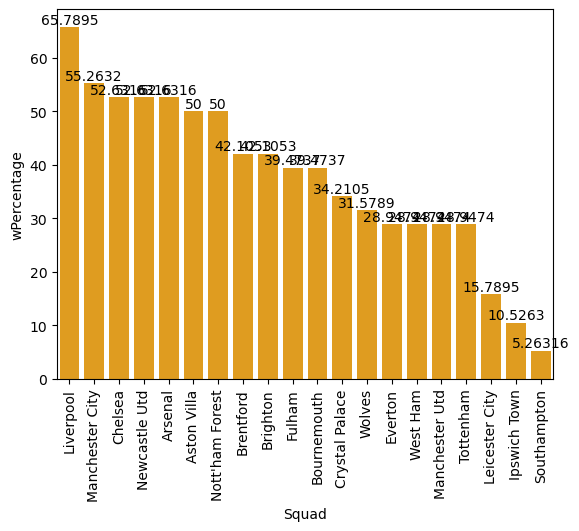

In [40]:
total_stats = df.sort_values(by='wPercentage',ascending=False)[['Squad','wPercentage','dPercentage','lPercentage']]
#plt.bar(total_stats['Squad'],total_stats['GF'], color='purple')
#total_stats.plot(kind='bar',x='Squad')
#plt.title('Total Premier League Goals by Team',color='blue')
#plt.ylabel('Percentage')
#plt.xlabel('Squad')

ax = sns.barplot(x=total_stats['Squad'],y=total_stats['wPercentage'],color='orange')
plt.xticks(rotation=90)
for container in ax.containers:
    ax.bar_label(container,label_type='edge')
#plt.show()

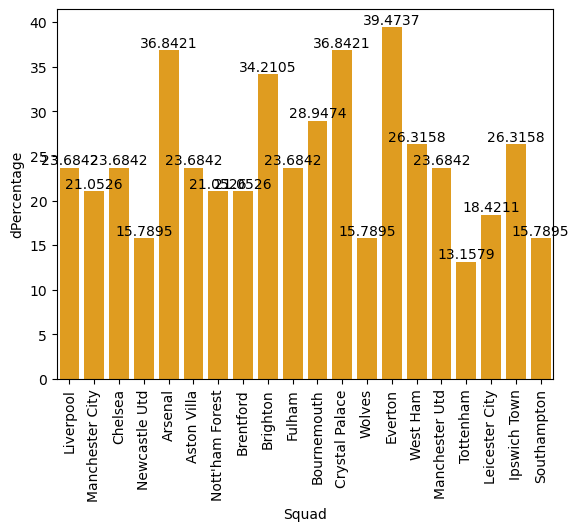

In [42]:
total_stats_draw = df.sort_values(by='wPercentage',ascending=True)[['Squad','wPercentage','dPercentage','lPercentage']]
ax = sns.barplot(x=total_stats['Squad'],y=total_stats['dPercentage'],color='orange')
plt.xticks(rotation=90)
for container in ax.containers:
    ax.bar_label(container,label_type='edge')

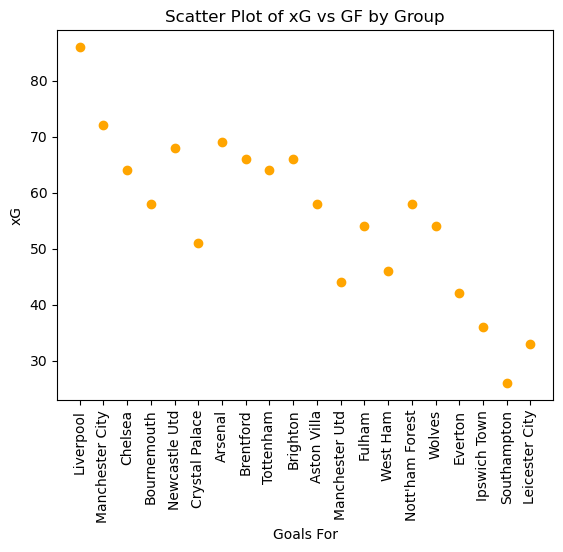

In [82]:
total_stats_xG = df.sort_values(by='xG',ascending=False)[['Squad','GF','xG']]
#sns.scatterplot(x=total_stats_xG['xG'], y=total_stats_xG['GF'],style=total_stats_xG['Squad'], s=300)
plt.scatter(total_stats_xG['Squad'],total_stats_xG['GF'], color='orange')
plt.title('Scatter Plot of xG vs GF by Group')
plt.xlabel('Goals For')
plt.ylabel('xG')
plt.xticks(rotation=90)
plt.show()